In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)

print(X.shape,Y.shape)


(500, 2) (500,)


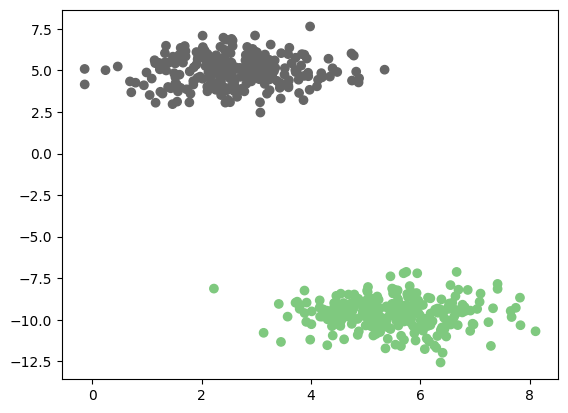

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

#Model and Helper Functions


In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def predict(X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

#Binary cross entropy
def loss(X,Y,weights):
    Y_=predict(X,weights)
    epsilon = 1e-15 
    Y_ = np.clip(Y_, epsilon, 1 - epsilon) 
    los= - (Y * np.log(Y_) + (1 - Y) * np.log(1 - Y_))
    cost=np.mean(los)
    return cost

def update(X,Y,weights,learning_rate):
    #Define the update rule for weights
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y-Y_)
    m=X.shape[0]
    weights=weights-learning_rate*dw/float(m)
    return weights

def train(X,Y,learning_rate,maxEpochs=200):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    #Initialize the weights
    
    weights=np.zeros(X.shape[1]) #n+1 entries
    
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        
        if epoch%10==0 :
            l=loss(X,Y,weights)
            print( "Epoch number %d Loss %.4f" % (epoch, l))
            
    return weights
    

In [5]:
weights=train(X,Y,learning_rate=0.01)

Epoch number 0 Loss 0.8423
Epoch number 10 Loss 4.9766
Epoch number 20 Loss 10.4211
Epoch number 30 Loss 15.9312
Epoch number 40 Loss 21.3931
Epoch number 50 Loss 24.9816
Epoch number 60 Loss 26.6933
Epoch number 70 Loss 28.3031
Epoch number 80 Loss 29.8696
Epoch number 90 Loss 31.2737
Epoch number 100 Loss 32.3603
Epoch number 110 Loss 33.1548
Epoch number 120 Loss 33.6900
Epoch number 130 Loss 34.0264
Epoch number 140 Loss 34.2441
Epoch number 150 Loss 34.3612
Epoch number 160 Loss 34.4236
Epoch number 170 Loss 34.4712
Epoch number 180 Loss 34.5007
Epoch number 190 Loss 34.5164


Visualization and Predictions****

In [6]:
def get_pred(X_test,weights,labels=True):
    if (X_test.shape[1]!=weights.shape[0]):
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
        
    probs=predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels
        

In [7]:
x1=np.linspace(-2,10,10)

x2=-(weights[0]*weights[1]*x1)/weights[2]
x2

array([-0.00342083, -0.00114028,  0.00114028,  0.00342083,  0.00570138,
        0.00798194,  0.01026249,  0.01254304,  0.0148236 ,  0.01710415])

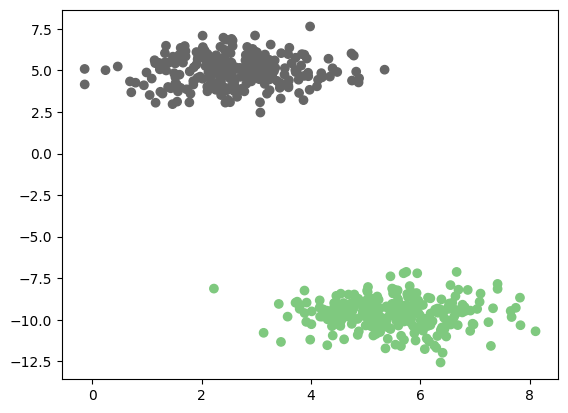

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

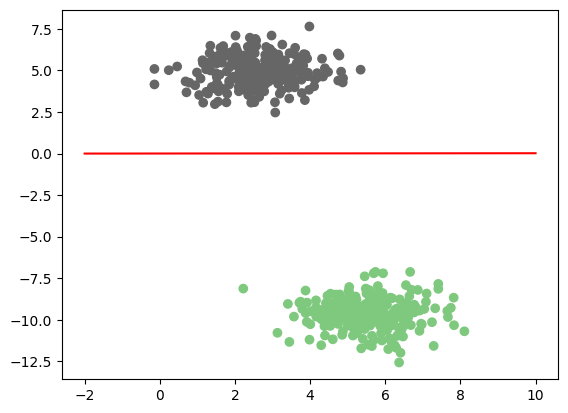

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,color='red')
plt.show()